In [1]:
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.inspection import permutation_importance

# Tree Ensembles 

## Assignment overview 

In this assignment you will build two types of tree ensemble models: Random Forest and Boosted. You will then investigate two methods for feature selection. 

###### Outline:


- [Part 1](#part1)- Importing the data set and formatting it 
- [Part 2](#part2)- Fitting a single decision tree
- [Part 3](#part3)- Using a Random Forest Classifier
- [Part 4](#part4)- Using the AdaBoost Classifier
- [Part 5](#part5)- Choosing the best classifier and retraining using all the samples, testing on the test set
- [Part 6](#part6)- Feature selection


[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - Importing the data set

For this excercise we will be using a data set from the University of Medicine and Pharmacy of Craiova, Romania to predict the hospitalisation period of patients after colon cancer operations based on socio-economic variables and clinical information. You can read more about the data and it's origins [here](https://figshare.com/articles/dataset/LOS_Colon_Cancer_621_cases/4747246/1). 

The data is stored in xlsx format again in the `colon_data.xlsx` file. Use the `read_excel()` function to load it.

In [2]:
df = pd.read_excel('colon_data.xlsx')
len(df)

298

Use the `.head()` function to visulise the data.

In [3]:
df.head()
df['CLASS'].unique()

array(['medium', 'short', 'long'], dtype=object)

First we want to replace the categorical values of the output (the `CLASS` variable) with numerical values. Fill in the gaps below to use the `.replace()` function to do this.

In [4]:
df['CLASS'].replace(to_replace=['medium', 'short', 'long'] , value=[1,2,3], inplace=True) 
df.head()

,AGE,SEX,TOPOGRAPHY,STAGE,T,N,M,SURGERY,CLASS
0,64,M,rect,three,T4,Nx,Mx,ten,1
1,70,M,rect,three,T4,Nx,Mx,ten,1
2,76,F,cec,three,T3,Nx,Mx,three,1
3,62,M,cec,three,T2,Nx,Mx,three,2
4,62,M,cec,two,T2,Nx,Mx,three,2


Now use the `get_dummies()` function to transform the other categorical variables to numerical ones. 

In [5]:
df = pd.get_dummies(df)
df.head()

,AGE,CLASS,SEX_F,SEX_M,TOPOGRAPHY_cec,TOPOGRAPHY_colon_asc,TOPOGRAPHY_colon_desc,TOPOGRAPHY_colon_sigm,TOPOGRAPHY_colon_trans,TOPOGRAPHY_jonc_rect_sigm,...,N_N1,N_N2,N_Nx,M_M0,M_M1,M_M1_hep,M_Mx,SURGERY_ten,SURGERY_three,SURGERY_two
0,64,1,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
1,70,1,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
2,76,1,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,62,2,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,62,2,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False


The following cell is just to ensure the 'CLASS' variable is the last column.

In [6]:
columns = df.columns.to_list()
columns.remove('CLASS')
df = df[columns + ['CLASS']]
df.head()

,AGE,SEX_F,SEX_M,TOPOGRAPHY_cec,TOPOGRAPHY_colon_asc,TOPOGRAPHY_colon_desc,TOPOGRAPHY_colon_sigm,TOPOGRAPHY_colon_trans,TOPOGRAPHY_jonc_rect_sigm,TOPOGRAPHY_rect,...,N_N2,N_Nx,M_M0,M_M1,M_M1_hep,M_Mx,SURGERY_ten,SURGERY_three,SURGERY_two,CLASS
0,64,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,True,False,False,1
1,70,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,True,False,False,1
2,76,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,1
3,62,False,True,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,2
4,62,False,True,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,2


We will now process the data similar to how we did for the loan data set activity.

Run the cell below to convert the `df` into a `NumPy` array

In [7]:
Xy=np.array(df)

For reproducibility, set the random seed = 1. You can do this by using the `NumPy` function `random.seed()`. Assign your seed to the variable `seed`. Next, complete the code cell below by using the function `random.shuffle()` on `Xy`.

In [8]:
seed = np.random.seed(1)
np.random.shuffle(Xy)

Before splitting the data into a training set, a test set, and a validation set, we need to divide `Xy` into two arrays: the first one, `X`, a 2D array containing all the predictors and the second, `y`, a 1D array with the response. 

Run the code cell below to generate `X`. Complete the remaining code to define `y`.

In [9]:
X=Xy[:,:-1]

In [10]:
#define y
y=Xy[:,-1]
y = y.astype(int)
y

array([1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3,
       3, 2, 2, 3, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 3,
       3, 1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 2, 2, 1, 2, 3, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       3, 1, 2, 1, 3, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 2, 3, 2, 2,
       2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 1])

Next, we need to split the messages into into 50% training data, 25% validation data, and 25% test data.

Run the code below to split `X` and `y` into training, validation and test sets.

In [11]:
trainsize = int(len(df)/2)
trainplusvalsize = int(len(df)/4)
X_train=X[:trainsize]
X_val=X[trainsize:trainsize + trainplusvalsize]
X_test=X[trainsize + trainplusvalsize:]

y_train=y[:trainsize]
y_val=y[trainsize:trainsize + trainplusvalsize]
y_test=y[trainsize + trainplusvalsize:]

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2: Fit a Single Decision Tree 

Use the same code as you used for the loan dataset notebook to fit decision trees with different depths up to `max_depth = 15`. Select the best depth - you will compare this to your tree ensemble methods later. 

In [12]:
bestdepth=-1
bestscore=0
max_depth = 15

for i in range(15):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    #fit the training sets
    clf.fit(X_train, y_train)
    #update trainscore
    trainscore=clf.score(X_train, y_train)
    #update valscore
    valscore=clf.score(X_val, y_val)
    print( 'Depth:', i+1, 'Train Score:', trainscore, 'Validation Score:', valscore)
    if valscore > bestscore:
        #update bestscore
        bestscore=valscore
        #update depth
        bestdepth=i+1


print('Bestscore: ', bestscore, 'Bestdepth: ',bestdepth)

Depth: 1 Train Score: 0.738255033557047 Validation Score: 0.6081081081081081
Depth: 2 Train Score: 0.7986577181208053 Validation Score: 0.6891891891891891
Depth: 3 Train Score: 0.8456375838926175 Validation Score: 0.7567567567567568
Depth: 4 Train Score: 0.8657718120805369 Validation Score: 0.7432432432432432
Depth: 5 Train Score: 0.912751677852349 Validation Score: 0.7297297297297297
Depth: 6 Train Score: 0.9463087248322147 Validation Score: 0.7567567567567568
Depth: 7 Train Score: 0.9664429530201343 Validation Score: 0.7432432432432432
Depth: 8 Train Score: 0.9731543624161074 Validation Score: 0.7702702702702703
Depth: 9 Train Score: 0.9798657718120806 Validation Score: 0.7297297297297297
Depth: 10 Train Score: 0.9932885906040269 Validation Score: 0.7702702702702703
Depth: 11 Train Score: 0.9932885906040269 Validation Score: 0.7567567567567568
Depth: 12 Train Score: 0.9932885906040269 Validation Score: 0.7432432432432432
Depth: 13 Train Score: 0.9932885906040269 Validation Score: 0.7

***Question***

What is the best maximum depth? 

8 

***Double click on this cell to enter your answer***


[Back to top](#Index:) 

<a id='part3'></a>

## Part 3: Random Forest

In this section you will learn how to build a random forest model in sklearn and explore the effect of the `max_features` hyperparameter. 

Use the `ensemble.RandomForestClassifier()` function to build a random forest model with the default parameters. Use the `.fit()` function to train it, the same as you did for the decision tree. 

In [13]:
rf_clf = ensemble.RandomForestClassifier()

rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
print ( 'Full tree guess train/validation ',rf_clf.score(X_train, y_train),rf_clf.score(X_val, y_val))

Full tree guess train/validation  0.9932885906040269 0.7702702702702703


In random forest classifiers, the algorithm only considers a subset of the features at each split. This is controlled using the `max_features` argument. Normally this subset size is set to the square root of the total number of features, but here we will look at both setting it to the square root `"sqrt"` (this is the default in sklearn) and to `None`. when `max_features = None` the algorithm is using all the features at every split. 


In [15]:
# for loop looking at RF with different max_features 

np.random.seed(1)
for val in ["sqrt",  None]:
    # build the rf classifier wwith different arguments for max_features
    #fit to the training data
    rf_clf = ensemble.RandomForestClassifier(max_features=val)
    rf_clf.fit(X_train, y_train)

    print ( f'Full tree guess train/validation {val}',rf_clf.score(X_train, y_train),rf_clf.score(X_val, y_val))


Full tree guess train/validation sqrt 0.9932885906040269 0.7837837837837838
Full tree guess train/validation None 0.9932885906040269 0.7837837837837838


***Question***

Which method performs best? Why might this be?
 
*Answer*: They perform similarly(due to seed, if seed is removed, sqrt is better. It reduces correlated features)

Rerun the cell above with different random seeds (but remember to set it back to `random_seed=1`). What happens? Why is this? 

*Answer*: However when seed is changed, their values differ slightly. This could be because: 

Random Selection of Features: In a Random Forest, each tree is trained on a random subset of features (especially when max_features is set to a value less than the total number of features). Changing the random seed changes the random subsets of features selected, which can lead to differences in how each tree in the forest makes decisions.

Random Selection of Data Points: Random Forest uses bootstrapping (sampling with replacement) to create different training sets for each tree. A different random seed leads to a different bootstrapped dataset for each tree, thus varying the learning process and outcomes.

Tree Initialization: The initialization of decision trees within the forest is also subject to randomness.
***Double click on this cell to enter your answer***



[Back to top](#Index:) 

<a id='part4'></a>

## Part 4: Boosting

For our boosting algorithm we will use scikit learn's AdaBoost. This boosting algorithm works by building an ensemble of weak classifiers (in our case decision trees) by sequentially weighting the incorrectly classified instances. 



Use the .AdaBoostClassifier() to build a boosting model and fit it to the training data.

In [16]:
ab_clf = ensemble.AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [17]:
print ( 'Full tree guess train/validation ',ab_clf.score(X_train, y_train),ab_clf.score(X_val, y_val))

Full tree guess train/validation  0.7785234899328859 0.6351351351351351


[Back to top](#Index:) 

<a id='part5'></a>

## Part 5: Model Selection

***Question***

Which model would you use for this dataset? Decision tree, Random Forest or Boosting? Why? 

Random forest, which has the best validation accuracy.
***Double click on this cell to enter your answer***



Retrain the best model with both the training and validation data and test it on the test data.

In [18]:
X_trainval = X[:trainsize + trainplusvalsize, :]
y_trainval = y[:trainsize + trainplusvalsize]

best_clf = ensemble.RandomForestClassifier()
best_clf.fit(X_trainval, y_trainval)

print ( 'Full tree guess train/validation ',best_clf.score(X_trainval, y_trainval),best_clf.score(X_test, y_test))

Full tree guess train/validation  0.9775784753363229 0.7866666666666666


[Back to top](#Index:) 

<a id='part6'></a>

# Part 6: Feature Selection

Feature selection can help us understand our model and the outputs it gives us, as well as remove any irrelevant predictors. In this section we will be looking at how to identify the most important features in a decision tree using two different methods:
- Impurity metric approaches
- Permutation Importances 

We will be looking at feature selection for your best model (`best_clf`)

Use the `.feature_importances_` function to get the inbuilt impurity metric measure. Then use the `.argsort()` 
function to sort the resulting feature importances. 



In [19]:
feature_importances = best_clf.feature_importances_
sorted_idx = feature_importances.argsort()
print(type(feature_importances))

<class 'numpy.ndarray'>


Get the feature names from the dataframe columns `.columns`. Remember to remove the last column from the list as this is the output column.

In [20]:
feature_names = df.columns.to_list()
feature_names.remove('CLASS')
feature_names = np.array(feature_names)

Use the function below to plot the importances.

In [21]:
def plot_impurity_metric_features( feature_importances, sorted_idx, feature_names):
    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_ticks, feature_importances[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_title("Random Forest Feature Importances")
    fig.tight_layout()
    plt.show()



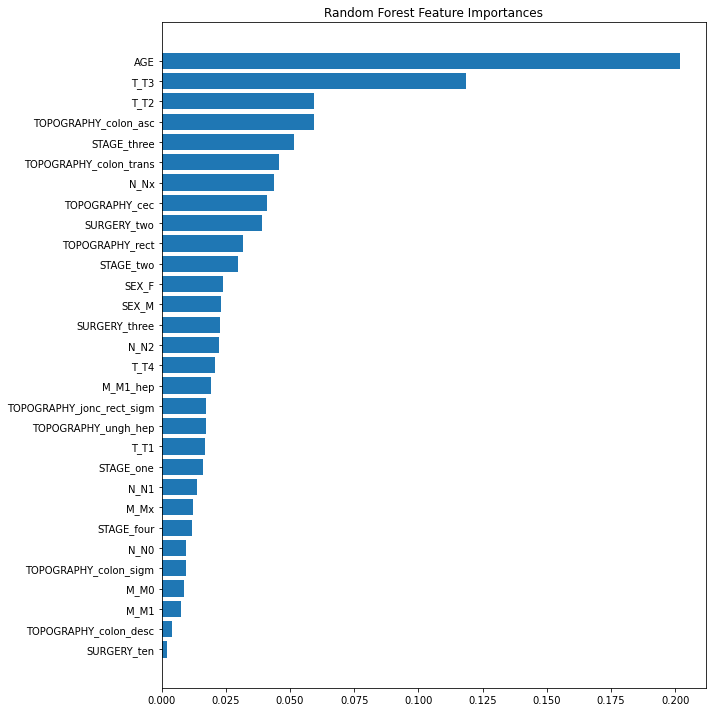

In [22]:
# plot the impurity metric feature importances 

plot_impurity_metric_features(feature_importances, sorted_idx, feature_names)

***Question***

What are the 3 most important features? 

Answer: Age, T_T3 and T_T2

***Double click on this cell to enter your answer***


One of the downsides of the inbuilt impurity metric is that it can only be applied to training data. This doesn't give us any indication of which features will be the most important on unseen data. 

Instead, we can use the permutation importance to measure the feature importances on both the training and validation sets. 

Complete the `permutation_importance` function to calculate the importance of the diffierent features in the training dataset. Then use the `argsort()` to sort the features in order of importance again.

In [23]:
# permutation method on both training and test
 
result = permutation_importance(estimator=best_clf, X=X_train, y=y_train, n_repeats=10, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
print(sorted_idx)

[21 18 27 26  5 15 28 20 11 12 24 23  6 19 10 25 16 14  1  2  9  8 29 13
  7  3 22  4  0 17]


Use the function below to plot the permutation importances.

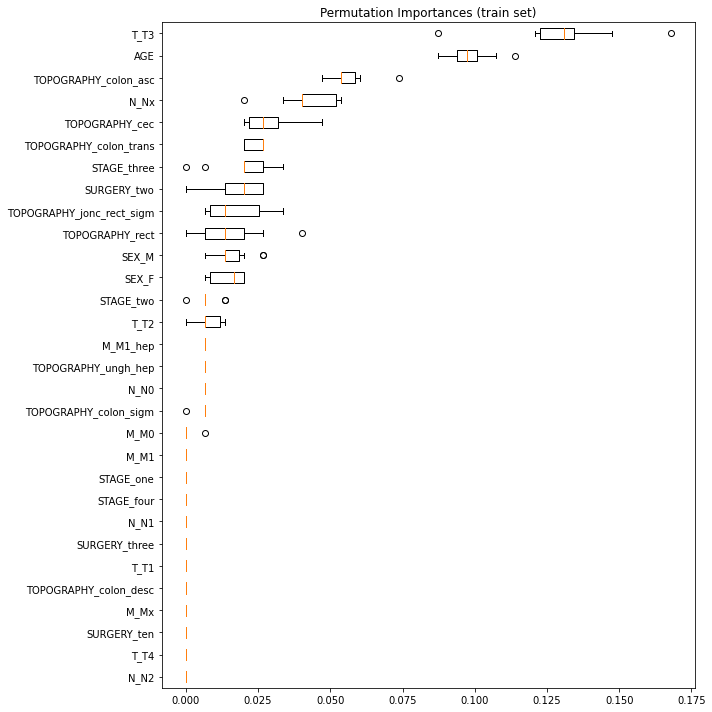

In [24]:

def plot_perm_importance(result, sorted_idx, feature_names):

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(
        result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
    )
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()
    
plot_perm_importance(result, sorted_idx, feature_names)


What do you notice about the difference between the two methods of doing feature selection? Why do you think this is?

***Double click on this cell to enter your answer***

Some features are left out. This could be due to:

Bias Towards Features with More Categories: Intrinsic feature importances can be biased towards numerical or high-cardinality categorical features, while permutation importance does not have this bias.

Handling of Correlated Features: Permutation importance can better account for correlations between features. If one of two correlated features is permuted, the model can still use the other, which may not significantly impact performance. In contrast, intrinsic importance might overestimate the importance of each correlated feature.

Model Dependency: Intrinsic importances are specific to the model (in this case, Random Forest), whereas permutation importance is model-agnostic and more closely related to the model's predictive ability on the specific dataset.

Now calculate the permutation importance on the test set. 

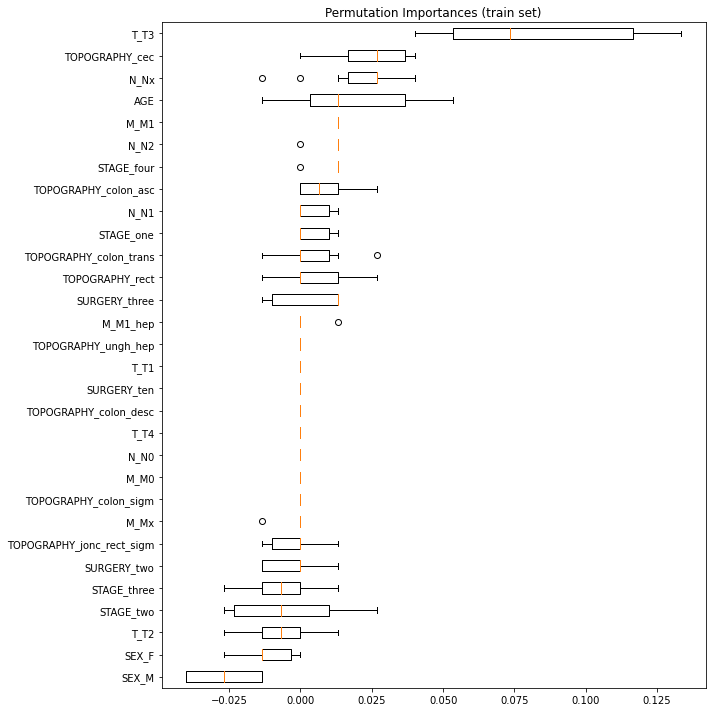

In [25]:
result = permutation_importance(estimator=best_clf , X=X_test , y=y_test , n_repeats=10, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

plot_perm_importance(result, sorted_idx, feature_names)

What do you see in the test data?

Why do some of the importances go negative?

***Double click on this cell to enter your answer***
The test data also differs in top 3 but T_T3 remains constant. 

Random Variations in Performance: Permutation importance is based on the change in model performance (like accuracy or mean squared error) after a feature's values have been randomly shuffled. If the model's performance happens to be slightly better on the shuffled data by random chance, the calculated importance can be negative. This is more likely to occur with small datasets or with models that are not very stable.

Model Overfitting: If the model is overfitting the data, it may have learned to rely on specific patterns or noise within the training data. When a feature is permuted, and the model performance unexpectedly improves, it could indicate that the model was using that feature to fit noise rather than meaningful signal. In this case, the negative importance suggests that the feature might be contributing to overfitting.

Noisy or Non-Informative Features: Sometimes, a feature might not actually have any meaningful relationship with the target variable (it's essentially noise). Permuting such a feature could lead to random fluctuations in model performance, which may sometimes appear as a slight improvement, resulting in negative importance.
(3 marks)